In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf

In [2]:
data = pd.read_csv('/Users/alexandre.sena/code/Ceynnah/Exercises/Klarna/dataset.csv', sep = ';')

In [3]:
data.columns

Index(['uuid', 'default', 'account_amount_added_12_24m',
       'account_days_in_dc_12_24m', 'account_days_in_rem_12_24m',
       'account_days_in_term_12_24m', 'account_incoming_debt_vs_paid_0_24m',
       'account_status', 'account_worst_status_0_3m',
       'account_worst_status_12_24m', 'account_worst_status_3_6m',
       'account_worst_status_6_12m', 'age', 'avg_payment_span_0_12m',
       'avg_payment_span_0_3m', 'merchant_category', 'merchant_group',
       'has_paid', 'max_paid_inv_0_12m', 'max_paid_inv_0_24m', 'name_in_email',
       'num_active_div_by_paid_inv_0_12m', 'num_active_inv',
       'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'num_arch_ok_0_12m',
       'num_arch_ok_12_24m', 'num_arch_rem_0_12m',
       'num_arch_written_off_0_12m', 'num_arch_written_off_12_24m',
       'num_unpaid_bills', 'status_last_archived_0_24m',
       'status_2nd_last_archived_0_24m', 'status_3rd_last_archived_0_24m',
       'status_max_archived_0_6_months', 'status_max_archived_0_12_months',

In [4]:
new_data = data.drop(columns=['account_incoming_debt_vs_paid_0_24m',
       'account_status', 'account_worst_status_0_3m',
       'account_worst_status_12_24m', 'account_worst_status_3_6m',
       'account_worst_status_6_12m','worst_status_active_inv','avg_payment_span_0_3m', 'num_arch_written_off_12_24m', 'num_arch_written_off_0_12m', 'avg_payment_span_0_12m', 'merchant_category', 'merchant_group', 'name_in_email'])

In [5]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99976 entries, 0 to 99975
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   uuid                              99976 non-null  object 
 1   default                           89976 non-null  float64
 2   account_amount_added_12_24m       99976 non-null  int64  
 3   account_days_in_dc_12_24m         88140 non-null  float64
 4   account_days_in_rem_12_24m        88140 non-null  float64
 5   account_days_in_term_12_24m       88140 non-null  float64
 6   age                               99976 non-null  int64  
 7   has_paid                          99976 non-null  bool   
 8   max_paid_inv_0_12m                99976 non-null  float64
 9   max_paid_inv_0_24m                99976 non-null  float64
 10  num_active_div_by_paid_inv_0_12m  77037 non-null  float64
 11  num_active_inv                    99976 non-null  int64  
 12  num_

In [6]:
new_data.isna().sum().sort_values()

uuid                                    0
sum_capital_paid_account_12_24m         0
sum_capital_paid_account_0_12m          0
recovery_debt                           0
status_max_archived_0_24_months         0
status_max_archived_0_12_months         0
status_max_archived_0_6_months          0
status_3rd_last_archived_0_24m          0
status_2nd_last_archived_0_24m          0
status_last_archived_0_24m              0
num_unpaid_bills                        0
num_arch_rem_0_12m                      0
num_arch_ok_12_24m                      0
sum_paid_inv_0_12m                      0
num_arch_ok_0_12m                       0
num_arch_dc_0_12m                       0
num_active_inv                          0
max_paid_inv_0_24m                      0
max_paid_inv_0_12m                      0
has_paid                                0
age                                     0
account_amount_added_12_24m             0
num_arch_dc_12_24m                      0
time_hours                        

In [7]:
new_data['account_days_in_term_12_24m'].replace(np.nan, 0, inplace=True)
new_data['account_days_in_rem_12_24m'].replace(np.nan, new_data['account_days_in_term_12_24m'].mean(),inplace=True)
new_data['account_days_in_dc_12_24m'].replace(np.nan, 0, inplace=True)
new_data['num_active_div_by_paid_inv_0_12m'].replace(np.nan, new_data['account_days_in_term_12_24m'].mean(), inplace=True)

In [8]:
test_data = new_data[new_data['default'].isna()]
test_data.isna().sum()

uuid                                    0
default                             10000
account_amount_added_12_24m             0
account_days_in_dc_12_24m               0
account_days_in_rem_12_24m              0
account_days_in_term_12_24m             0
age                                     0
has_paid                                0
max_paid_inv_0_12m                      0
max_paid_inv_0_24m                      0
num_active_div_by_paid_inv_0_12m        0
num_active_inv                          0
num_arch_dc_0_12m                       0
num_arch_dc_12_24m                      0
num_arch_ok_0_12m                       0
num_arch_ok_12_24m                      0
num_arch_rem_0_12m                      0
num_unpaid_bills                        0
status_last_archived_0_24m              0
status_2nd_last_archived_0_24m          0
status_3rd_last_archived_0_24m          0
status_max_archived_0_6_months          0
status_max_archived_0_12_months         0
status_max_archived_0_24_months   

In [9]:
X_to_pred = test_data.drop(columns = ['default', 'uuid'])
y_to_pred = test_data['default']

In [10]:
train_data = new_data[new_data['default'].notna()]
len(train_data.index)

89976

In [61]:
X_to_train = train_data.drop(columns = ['default', 'uuid'])
y_to_train = train_data['default']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_to_train, y_to_train, test_size=0.2)

# Models

## Logistic Regression

In [63]:
model_lg = LogisticRegression(max_iter = 10_000, class_weight='balanced')
cv_score = cross_validate(model_lg, X_train, y_train, cv = 5, scoring = 'recall')['test_score'].mean()
cv_score

0.8217503586800575

## KNN Classifier

In [65]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
base_knn_score = cross_validate(model_knn, X_train, y_train, cv = 5, scoring = 'recall')['test_score'].mean()
base_knn_score

0.09991391678622667

## RNN

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=30)

def initialize_model():
   
    model_deep = models.Sequential()
    model_deep.add(layers.Dense(5, activation='relu', input_dim = 2)) 
    model_deep.add(layers.Dense(3, activation='relu'))
    model_deep.add(layers.Dense(1, activation='sigmoid'))

    model_deep.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['recall']) 
    
    return model_deep

model_deep = initialize_model()

2022-03-16 17:36:51.431823: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model_deep.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [26]:
y_train.shape

(71980,)

In [49]:
y_train = np.asarray(y_train).astype('int64')
X_train = np.asarray(X_train).astype('float32')
y_train.shape, X_train.shape

((71980,), (71980, 27))

In [50]:
history = model_deep.fit(X_train, y_train, 
                    batch_size=16, epochs=200,
                    validation_split=0.3,
                    verbose = 0,
                    callbacks=[es])

ValueError: in user code:

    File "/Users/alexandre.sena/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/keras/engine/training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "/Users/alexandre.sena/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/keras/engine/training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/alexandre.sena/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/keras/engine/training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "/Users/alexandre.sena/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/keras/engine/training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "/Users/alexandre.sena/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/alexandre.sena/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/keras/engine/input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 2), found shape=(None, 27)


In [67]:
model_lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [69]:
y_pred = model_lg.predict(X_test)

In [70]:
y_pred

array([0., 0., 1., ..., 0., 0., 1.])

In [71]:
print('Accuracy =', round(accuracy_score(y_test, y_pred), 2))
print('Precision =', round(precision_score(y_test, y_pred), 2))
print('Recall =', round(recall_score(y_test, y_pred), 2))
print('F1 score =', round(f1_score(y_test, y_pred),2))

Accuracy = 0.74
Precision = 0.04
Recall = 0.79
F1 score = 0.08


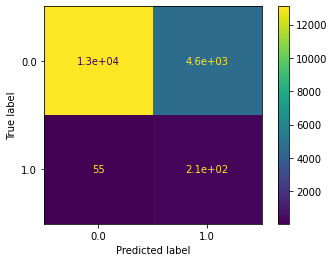

In [73]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_lg, X_test, y_test)

In [75]:
y_pred = model_lg.predict(X_to_pred)

In [76]:
test_data = test_data.drop(columns = ['default'])
test_data['pd'] = y_pred

KeyError: "['default'] not found in axis"

In [77]:
pred = test_data[['uuid', 'pd']]
pred = pred.reset_index(drop=True)

KeyError: "['pd'] not in index"

In [ ]:
pred